<h1>Prediksi Kelas Protein Pada Bakteri Ragi dengan Logistic Regression</h1>

## Logistic Regression

__Logistic Regression__ merupakan variasi dari Linear Regression yang digunakan untuk dataset dengan <i>dependent variable</i> atau kolom targetnya bertipe kategori. Algoritma ini memprediksi probabilitas label kelas sebagai fungsi dari variabel independen.

Logistik regression menyesuaikan kurva berbentuk S dengan menggunakan Linear regression dan mentransformasi estimasi numerik menjadi probabilitas.

## Dataset

Dataset yang akan digunakan adalah dataset <a href="https://datahub.io/machine-learning/yeast">Yeast</a>. Dataset ini berisi data situs lokalisasi protein pada bakteri ragi, berdasarkan beberapa uji bio-statistik.

__Attribute Information:__

* __mcg:__ McGeoch's method for signal sequence recognition.
* __gvh:__ von Heijne's method for signal sequence recognition.
* __alm:__ Score of the ALOM membrane spanning region prediction program.
* __mit:__ Score of discriminant analysis of the amino acid content of the N-terminal region (20 residues long) of mitochondrial and non-mitochondrial proteins.
* __erl:__ Presence of "HDEL" substring (thought to act as a signal for retention in the endoplasmic reticulum lumen). Binary attribute.
* __pox:__ Peroxisomal targeting signal in the C-terminus.
* __vac:__ Score of discriminant analysis of the amino acid content of vacuolar and extracellular proteins.
* __nuc:__ Score of discriminant analysis of nuclear localization signals of nuclear and non-nuclear proteins.
* __class_protein_localization:__ Predicted Attribute, Localization site of protein. ( non-numeric )

<i>import library</i> yang dibutuhkan.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<i>load</i> data ke dalam dataframe Pandas dengan <code>read_csv()</code>.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [4]:
# Load dataset

df = pd.read_csv("yeast.csv")
df.head(10)

,mcg,gvh,alm,mit,erl,pox,vac,nuc,class_protein_localization
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT
5,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,CYT
6,0.50,0.54,0.48,0.65,0.5,0.0,0.53,0.22,MIT
7,0.48,0.45,0.59,0.20,0.5,0.0,0.58,0.34,NUC
8,0.55,0.50,0.66,0.36,0.5,0.0,0.49,0.22,MIT
9,0.40,0.39,0.60,0.15,0.5,0.0,0.58,0.30,CYT


ada 8 kolom fitur yang berisi nilai numerik, sementara itu kolom target kelasnya berisi nilai non-numerik.

Melihat jumlah data untuk tiap kelas/kategori di kolom target <code>class_protein_localization</code>.

In [5]:
# Menghitung jumlah data pada tiap kelas/kategori

df['class_protein_localization'].value_counts()

CYT    463
NUC    429
MIT    244
ME3    163
ME2     51
ME1     44
EXC     35
VAC     30
POX     20
ERL      5
Name: class_protein_localization, dtype: int64

visualisasi dengan <code>countplot()</code> dari Seaborn.

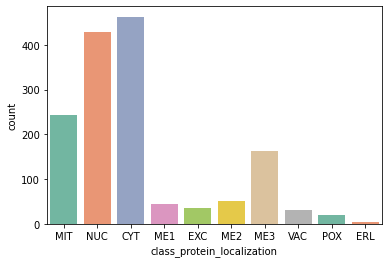

In [6]:
# Menampilkan visualisasi dengan countplot Seaborn

sns.countplot(x='class_protein_localization', data=df, palette='Set2')

Untuk kolom numerik, kita dapat melihat sebaran datanya dengan histogram.

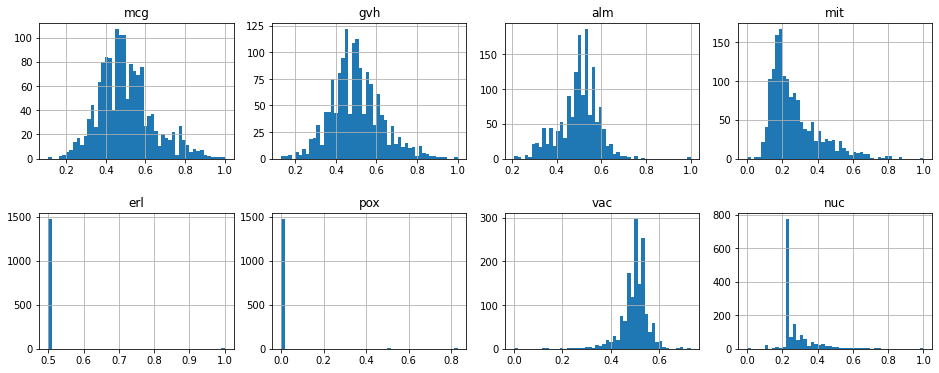

In [7]:
# Menampilkan histogram dari kolom fitur numerik

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(16, 6)) 

# Menambahkan subplot dengan indexing
ax0 = fig.add_subplot(ax[0,0]) 
ax1 = fig.add_subplot(ax[0,1])  
ax2 = fig.add_subplot(ax[0,2])  
ax3 = fig.add_subplot(ax[0,3]) 
ax4 = fig.add_subplot(ax[1,0])  
ax5 = fig.add_subplot(ax[1,1]) 
ax6 = fig.add_subplot(ax[1,2]) 
ax7 = fig.add_subplot(ax[1,3])   

df.hist(column='mcg', bins=50, ax=ax0)
df.hist(column='gvh', bins=50, ax=ax1)
df.hist(column='alm', bins=50, ax=ax2)
df.hist(column='mit', bins=50, ax=ax3)
df.hist(column='erl', bins=50, ax=ax4)
df.hist(column='pox', bins=50, ax=ax5)
df.hist(column='vac', bins=50, ax=ax6)
df.hist(column='nuc', bins=50, ax=ax7)

plt.subplots_adjust(wspace=0.2, hspace=0.4)
plt.show()

Korelasi antar fitur dapat ditunjukkan dengan <code>heatmap()</code> dari Seaborn.

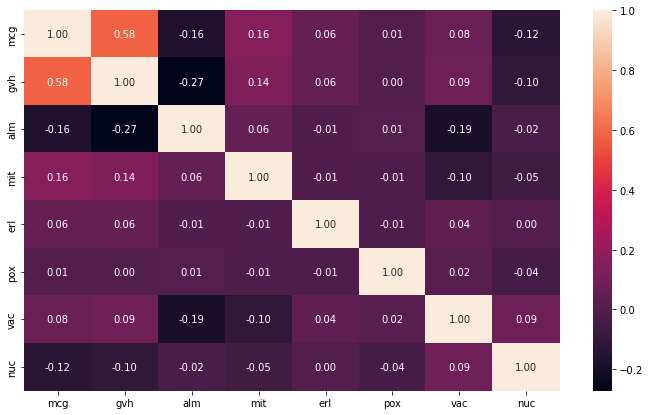

In [8]:
# Menampilkan korelasi antar fitur

plt.figure(figsize=(12,7))

corr = df.corr()
sns.heatmap(corr, annot=True, fmt='.2f')

## Preprocessing

In [9]:
# Melihat info dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1484 entries, 0 to 1483
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   mcg                         1484 non-null   float64
 1   gvh                         1484 non-null   float64
 2   alm                         1484 non-null   float64
 3   mit                         1484 non-null   float64
 4   erl                         1484 non-null   float64
 5   pox                         1484 non-null   float64
 6   vac                         1484 non-null   float64
 7   nuc                         1484 non-null   float64
 8   class_protein_localization  1484 non-null   object 
dtypes: float64(8), object(1)
memory usage: 104.5+ KB


Dari hasil di atas, tidak terlihat ada <i>missing values</i> dan tipe datanya juga sudah sesuai.

### Train test split

In [10]:
# Mendefinisikan fitur dan target

X = df.drop('class_protein_localization', axis=1)       # fitur
y = df['class_protein_localization']                    # target

lakukan <code>train_test_split()</code>.

In [11]:
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1187, 8) (1187,)
Test set: (297, 8) (297,)


## Modeling 

### Klasifikasi dengan Logistic Regression

Dalam pemodelan dengan <code>LogisticRegression()</code> ini, menggunakan <code>solver = 'liblinear'</code> dan <code>class_weight = 'balanced'</code>.

In [12]:
from sklearn.linear_model import LogisticRegression

# Training dan testing model
model_logreg = LogisticRegression(solver='liblinear', class_weight='balanced').fit(X_train, y_train)
y_pred = model_logreg.predict(X_test)

### Evaluasi

evaluasi kinerja model tersebut dengan <code>accuracy_score()</code>.

In [13]:
from sklearn.metrics import accuracy_score

# Skor akurasi untuk data train dan test
print('Train set Accuracy: %.2f' % accuracy_score(y_train, model_logreg.predict(X_train)))
print('Test set Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Train set Accuracy: 0.57
Test set Accuracy: 0.58


menampilkan <code>classification_report</code>-nya.

In [14]:
from sklearn.metrics import classification_report

print('Classification report : ')
print(classification_report(y_test, y_pred, zero_division=1))

Classification report : 
              precision    recall  f1-score   support

         CYT       0.58      0.63      0.60        90
         ERL       0.50      1.00      0.67         1
         EXC       0.44      0.44      0.44         9
         ME1       0.55      0.86      0.67         7
         ME2       0.29      0.42      0.34        12
         ME3       0.72      0.81      0.76        32
         MIT       0.58      0.57      0.57        51
         NUC       0.65      0.48      0.55        86
         POX       0.80      0.67      0.73         6
         VAC       0.00      0.00      0.00         3

    accuracy                           0.58       297
   macro avg       0.51      0.59      0.53       297
weighted avg       0.60      0.58      0.58       297



hasil akurasi untuk <i>data test</i> sekitar __0.58__, sementara untuk <i>data train</i> sekitar __0.57__.

### K-Fold Cross Validation

__Cross Validation__ adalah sebuah teknik <i>resampling</i> yang digunakan untuk mengevaluasi model <i>machine learning</i> pada sampel data yang jumlahnya terbatas. Teknik ini memiliki parameter tunggal, yaitu <b>K</b>, yang merujuk pada jumlah kelompok yang akan dibagi menjadi sampel data. Karena itu, teknik ini biasa disebut dengan __K-Fold Cross Validation__.

Jadi, misal memilih nilai 5 sebagai K, berarti akan membagi dataset menjadi 5 kelompok. Nantinya akan ada 5 kali proses, dimana dalam tiap proses, salah satu kelompok menjadi <i>test data</i> dan sisanya menjadi <i>train data</i>. Skor akurasi yang dihasilkan merupakan skor rata-rata dari 5 proses tersebut.  

Di Python, K-Fold Cross Validation dapat digunakan dengan mengimpor <i>package</i> <code>KFold</code> dari <i>library</i> <code>sklearn.model_selection</code>. Nilai K dapat didefinisikan dengan parameter <code>n_splits</code>.

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=7, random_state=3, shuffle=True) 

X = df.drop('class_protein_localization', axis=1)       # fitur
y = df['class_protein_localization']                    # target

# Training dan testing model
model_logreg = LogisticRegression(solver='liblinear', class_weight='balanced').fit(X, y)

# Evaluasi model dengan cross_val_score dengan scoring 'accuracy'
scores = cross_val_score(model_logreg, X, y, scoring='accuracy', cv=kf, n_jobs=-1)
print('Accuracy score: %.2f' % (np.mean(scores)))

Accuracy score: 0.57


Dari hasil di atas, akurasi yang didapatkan adalah sebesar __0.57__.

melihat akurasi tiap iterasi seperti di bawah ini.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 

n = 7
scores = []

kf = KFold(n_splits=n, random_state=3, shuffle=True) 

X = df.drop('class_protein_localization', axis=1)       # fitur
y = df['class_protein_localization']                    # target

for train_index, test_index in kf.split(df):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Training dan testing model
    model_logreg = LogisticRegression(solver='liblinear', class_weight='balanced').fit(X_train, y_train)

    score_logreg = model_logreg.score(X_test, y_test)
    scores.append(score_logreg)
    display(score_logreg)
    
mean_acc = sum(scores) / n
print('Mean accuracy score : %.2f' % mean_acc)

0.5754716981132075

0.6037735849056604

0.589622641509434

0.5471698113207547

0.5518867924528302

0.5377358490566038

0.5566037735849056

Mean accuracy score : 0.57




---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


